<a href="https://colab.research.google.com/github/mueller14003/PH150/blob/main/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physics 150 
# Lab #5 - Projectile Motion I


**Group 4:**
* Kyle Mueller
* Sam Fataua
* Makenzy Pharis

## Introduction

Using Python code, you will construct a model for the motion of a projectile. We will neglect air resistance in our model. The model use of Euler's mthod for the x and y componentd of the motion. The equations are:

$x_{n+1} = x_{n}+v_{x,n}\times{}\Delta{}t$

$y_{n+1} = y_{n}+v_{y,n}\times{}\Delta{}t-\frac{1}{2}g\Delta{}t^2$

$v_{x,n+1} = v_{x,n}$

$v_{y,n+1} = v_{y,n}-g\times{}\Delta{}t$

Using the model, you will predict the range of motion for a steel ball given an initial angle and initial heaight. You will need to do this for three different settings on the projectile launcher.

## Procedure

### *1. Determine the Initial Velocity for each Launch Setting*

A good way to determine $v_i$ is to fire the projectile with $\theta{}_{i}=0°$ from a known height, $y_i$.  (It is preferable to shoot from a table top.) The initial velocity can then be calculated using the equation:

$$v_{i} = R\sqrt{\frac{g}{2y_{i}}}$$

where R is the range.

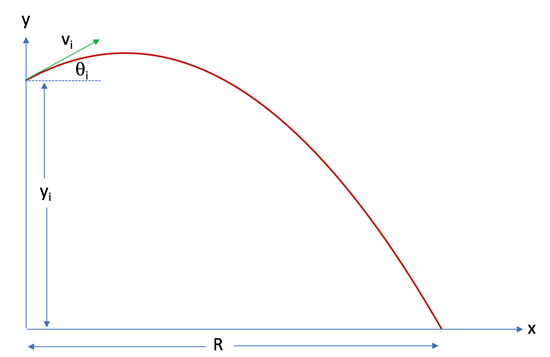

In [17]:
from IPython.display import Markdown

g = 9.8
y_i = 1.01
get_vi = lambda R:f"{R*(g/(2*y_i))**0.5:0.2f}|"

r = [1.02,1.59,2.15]

header="|Power|$v_i$|\n|:-:|-:|\n"
Markdown(header+'\n'.join([*map('|'.join,[*zip(map(lambda i:f"|{i}",range(1,4)),map(get_vi,r))])]))

|Power|$v_i$|
|:-:|-:|
|1|2.25|
|2|3.50|
|3|4.74|

### *2. Construct a Python Model*

Using equations (1-4) above, write Python code that will output the range of motion:

Programming tips:

1.   You will need 2 constants, 6 initial conditions, and 3 equations in the “while” loop. You won't need an equation for $v_x$ in the "while" loop since it doesn't change and you don't need to keep track of $t$.
2.   Inputs for sin and cos require the angle to be in radians.



In [7]:
from math import cos, sin, tan, pi

g = 9.8
dt = 0.01

get_vi = lambda R:R*(g/(2*1.325))**0.5

r = [1.25,1.92,2.67]

v_i = dict(zip(range(1,4),map(get_vi,r)))

v_ix = lambda p_lvl,θi: v_i.get(p_lvl)*cos(pi*θi/180)
v_iy = lambda p_lvl,θi: v_i.get(p_lvl)*sin(pi*θi/180)

x_np1 = lambda xn,vxn: xn+vxn*dt
y_np1 = lambda yn,vyn: yn+vyn*dt - 0.5*g*dt**2
v_ynp1 = lambda vyn: vyn-g*dt

def fun(yi,θi,p_lvl):
  x = 0
  y = y_i
  v_x = v_ix(p_lvl,θi)
  v_y = v_iy(p_lvl,θi)
  
  while y > 0:
    x = x_np1(x,v_x)
    y = y_np1(y,v_y)
    v_y = v_ynp1(v_y)
  
  return x

### *3. Test the Model*

Try different angles (two or three) at each launch setting. Use the model to give a predicted range and compare to the measured range. It is possible that the launch velocity might be dependent on launch angle. If the initial velocity needs to be adjusted, the following equation can be used:

$$v_{i} = \frac{R}{\cos{\theta{}_{i}}}\sqrt{\frac{g}{2(\tan{\theta{}_{i})R+2y_{i}})}}$$

In [52]:
ev = fun(1.01,30,1)
av = 1.24
print(f"Expected: {ev:0.2f} m\nActual: {av} m")

Expected: 1.25 m
Actual: 1.24 m


In [51]:
ev = fun(1.01,60,1)
av = 0.89
print(f"Expected: {ev:0.2f} m\nActual: {av} m")

Expected: 0.87 m
Actual: 0.89 m


In [50]:
ev = fun(1.01,30,2)
av = 2.15
print(f"Expected: {ev:0.2f} m\nActual: {av} m")

Expected: 2.17 m
Actual: 2.15 m


In [49]:
ev = fun(1.01,60,2)
av = 1.66
print(f"Expected: {ev:0.2f} m\nActual: {av} m")

Expected: 1.64 m
Actual: 1.66 m


In [48]:
ev = fun(1.01,30,3)
av = 3.50
print(f"Expected: {ev:0.2f} m\nActual: {av} m")

Expected: 3.51 m
Actual: 3.5 m


In [47]:
ev = fun(1.01,60,3)
av = 2.83
print(f"Expected: {ev:0.2f} m\nActual: {av} m")

Expected: 2.82 m
Actual: 2.83 m


### *4. Ask the Insructor for your Initial Velocity and Setting*

The instructor will give your group:

1.	An initial angle (between 20° and 70°)
2.	An initial height (between 1.0 and 1.4 meters)
3.	One of the three settings on the launcher

Using your model (you won’t be allowed to use your launcher after given this information) you will make a prediction on the range (horizontal distance) of the projectile. Let the instructor know when you are ready to test the prediction.


In [21]:
y_0 = 1.131
θ_0 = 34
p_lvl = 2
R_e = fun(y_0,θ_0,p_lvl)

print(f"Estimated range: {R_e:0.2f} m")

Estimated range: 2.20 m


In [54]:
# Actual recorded range
R_a = 2.19

print(f"Expected: {R_e:0.2f} m\nActual: {R_a} m")

Expected: 2.20 m
Actual: 2.19 m


#### Final Score

Your grade for the lab will be performance based and will be calculated from:  
          
100% - 3 x (percent difference of predicted and measured range).


In [53]:
# Percent difference
p_diff = (abs(R_a-R_e)/R_a) * 100

# This seems unfair. We lost 2 percentage points for being 1cm off?
grade = 100 - 3 * p_diff
print(f"Grade: {grade:0.2f}%")

Grade: 98.09%
